In [90]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [92]:
# Load the data
df = pd.read_csv("../data/train.csv")

In [93]:
# Import dataProcessor class from data_processor.py file
from data_processor import DataProcessor

data_processor = DataProcessor() 
df_num = data_processor.numerical_data(df)
df_ord = data_processor.ordinal_data(df)

In [94]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


In [95]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the ordinal data
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df_ord)

# Convert the encoded data back to a DataFrame
encoded_ord_df = pd.DataFrame(encoded_data, columns=df_ord.columns)

# Add salesPrice column to the encoded_ord_df
encoded_ord_df['SalePrice'] = df_num['SalePrice']

encoded_ord_df.head()


,LandSlope,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,NaN,4.0,4.0,NaN,208500
1,0.0,2.0,3.0,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,NaN,181500
2,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,NaN,223500
3,0.0,3.0,1.0,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,NaN,140000
4,0.0,2.0,3.0,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,NaN,250000


Analysis of **Numerical** data
1. Use correlation matrix to find top features.
2. Use pairplot to visualize them.1

In [96]:
# Find the correlation between the numerical data and the target
correlation = df_num.corr()
correlation = correlation['SalePrice'].sort_values(ascending=False)
correlation = correlation.drop('SalePrice')
print(correlation)


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Features with correlation higher than 0.4: 
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64




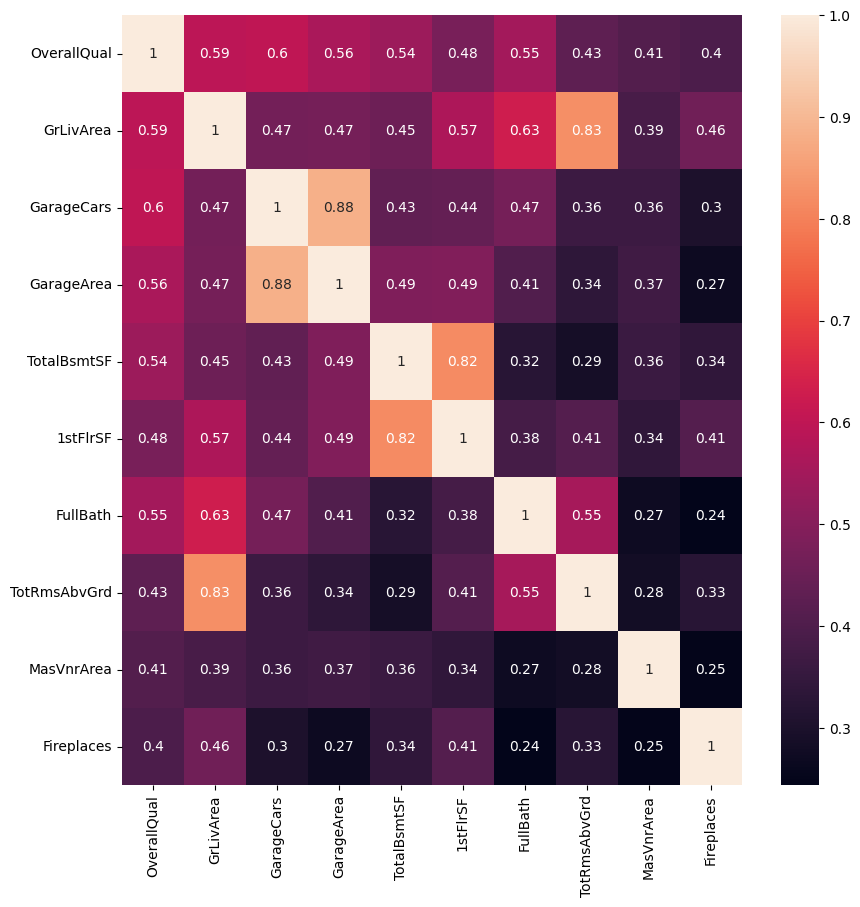

In [97]:
# top features with high correlation with the target
threshold = 0.4
top_features = correlation[correlation > threshold]
print("Features with correlation higher than 0.4: ")
print(top_features)
print("\n")

# Check for multicollinearity among the top features
corr_matrix_top_features = df_num[top_features.index].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_top_features, annot=True)
plt.show()

In [98]:
# Drop one of the highly correlated features with one another,correration > 0.8
high_corr_feature_pairs = []
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        if abs(corr_matrix_top_features.iloc[i, j]) > 0.8:
            high_corr_feature_pairs.append((top_features.index[i], top_features.index[j]))
print("Highly correlated feature pairs: ", high_corr_feature_pairs)
print("\n")

# Randomly drop one of the features in the highly correlated pairs
import random
for pair in high_corr_feature_pairs:
    drop_feature = random.choice(pair)
    if drop_feature in top_features:
        top_features = top_features.drop(drop_feature)

print("Features with correlation higher than 0.8 after dropping highly correlated features: ")
print(top_features)


Highly correlated feature pairs:  [('GrLivArea', 'TotRmsAbvGrd'), ('GarageCars', 'GarageArea'), ('TotalBsmtSF', '1stFlrSF')]


Features with correlation higher than 0.8 after dropping highly correlated features: 
OverallQual     0.790982
GarageCars      0.640409
TotalBsmtSF     0.613581
FullBath        0.560664
TotRmsAbvGrd    0.533723
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64


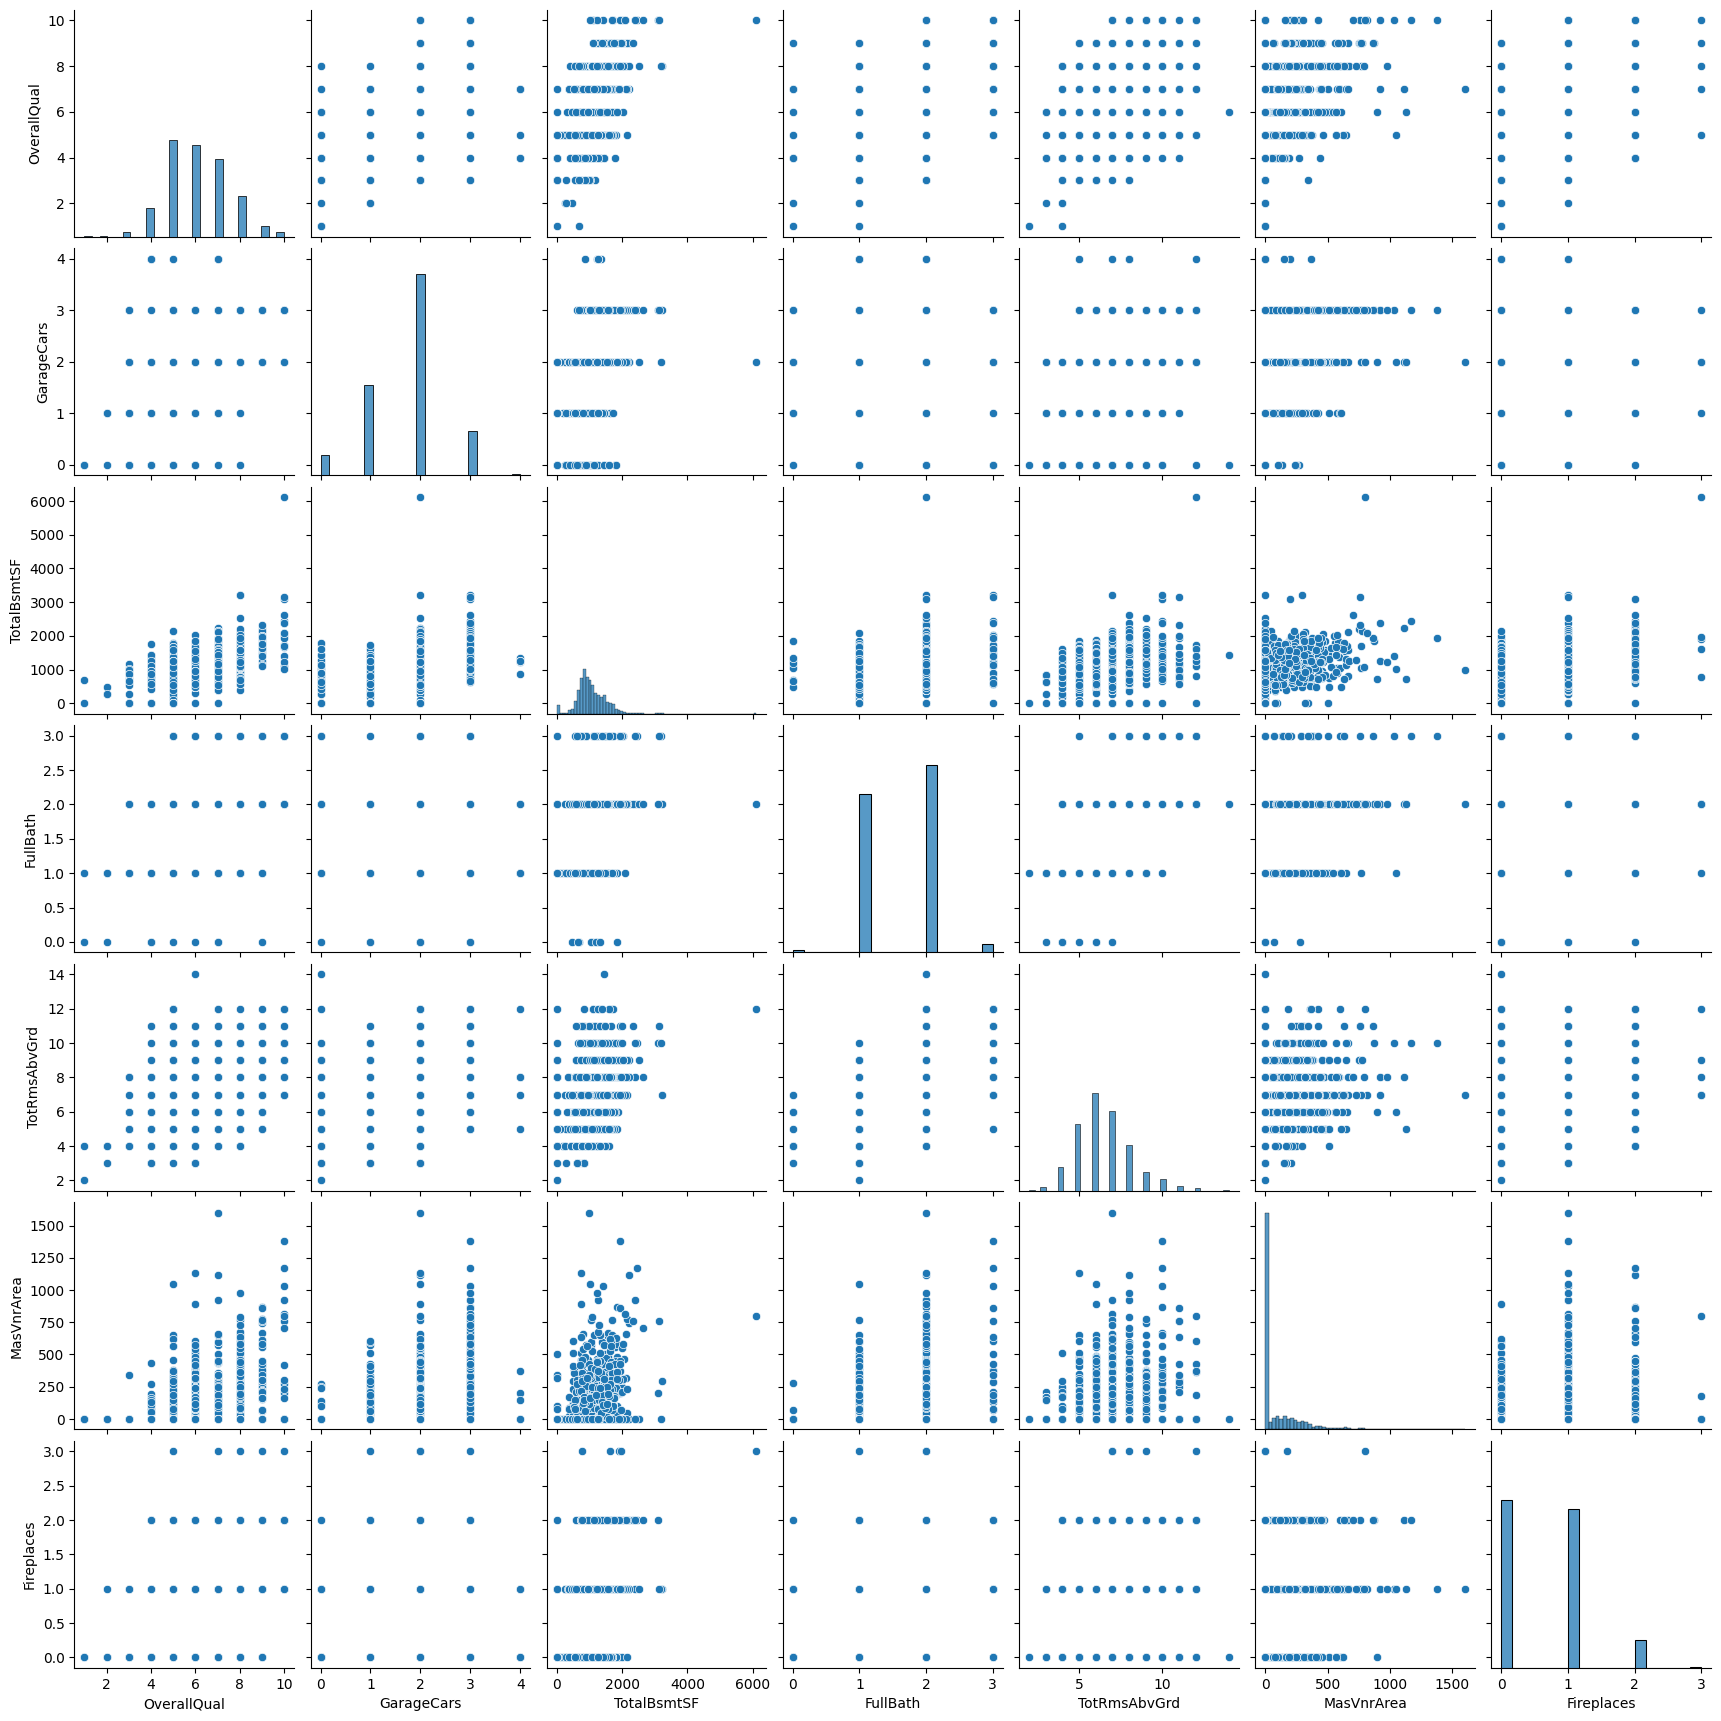

In [99]:
# Now we plot pairplot for top features
sns.pairplot(df_num[top_features.index])
plt.show()

Analysis of **ordinal** data
1. Use correlation matrix to find top features.
2. Use pairplot to visualize them.

In [100]:
# Analysis of ordinal data
# Find the correlation between the ordinal data and the target
ord_correlation = encoded_ord_df.corr()
ord_correlation = ord_correlation['SalePrice'].sort_values(ascending=False)
ord_correlation = ord_correlation.drop('SalePrice')
print(ord_correlation)

Electrical      0.234990
GarageCond      0.150576
Functional      0.115328
GarageQual      0.115119
BsmtCond        0.060362
LandSlope       0.051152
BsmtFinType2    0.041161
BsmtFinType1   -0.064531
FireplaceQu    -0.166817
HeatingQC      -0.400178
KitchenQual    -0.589189
PoolQC         -0.595229
BsmtQual       -0.611179
Name: SalePrice, dtype: float64


Top 5 ordinal features: 
Electrical    0.234990
GarageCond    0.150576
Functional    0.115328
GarageQual    0.115119
BsmtCond      0.060362
Name: SalePrice, dtype: float64




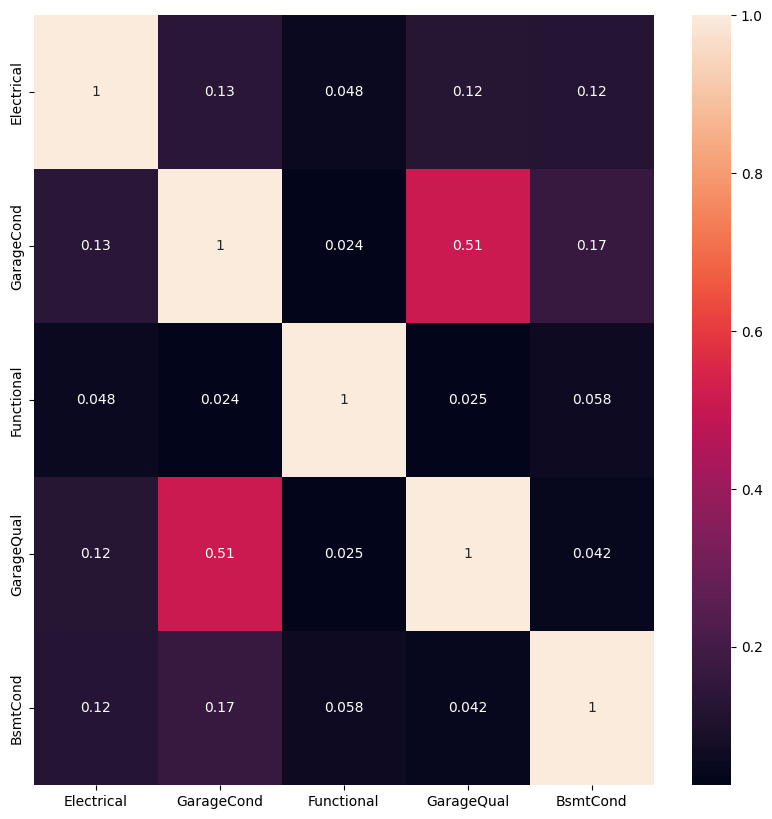

In [101]:
# top ordinal features with high correlation with the target
top_ord_features = ord_correlation.head(5) # top 5 ordinal features
print("Top 5 ordinal features: ")
print(top_ord_features)
print("\n")

# Check for multicollinearity among the top ordinal features
ord_corr_matrix_top_features = encoded_ord_df[top_ord_features.index].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(ord_corr_matrix_top_features, annot=True)
plt.show()

In [102]:
# Drop one of the highly correlated ordinal features with one another,correration > 0.8
ord_high_corr_feature_pairs = []
for i in range(len(top_ord_features)):
    for j in range(i+1, len(top_ord_features)):
        if abs(ord_corr_matrix_top_features.iloc[i, j]) > 0.8:
            ord_high_corr_feature_pairs.append((top_ord_features.index[i], top_ord_features.index[j]))
print("Highly correlated ordinal feature pairs: ")
print(ord_high_corr_feature_pairs)
print("\n")

# Randomly drop one of the features in the highly correlated pairs
import random
for pair in ord_high_corr_feature_pairs:
    drop_feature = random.choice(pair)
    if drop_feature in top_ord_features:
        top_ord_features = top_ord_features.drop(drop_feature)

print("Ordinal features with correlation higher than 0.8 after dropping highly correlated features: ")
print(top_ord_features)

Highly correlated ordinal feature pairs: 
[]


Ordinal features with correlation higher than 0.8 after dropping highly correlated features: 
Electrical    0.234990
GarageCond    0.150576
Functional    0.115328
GarageQual    0.115119
BsmtCond      0.060362
Name: SalePrice, dtype: float64


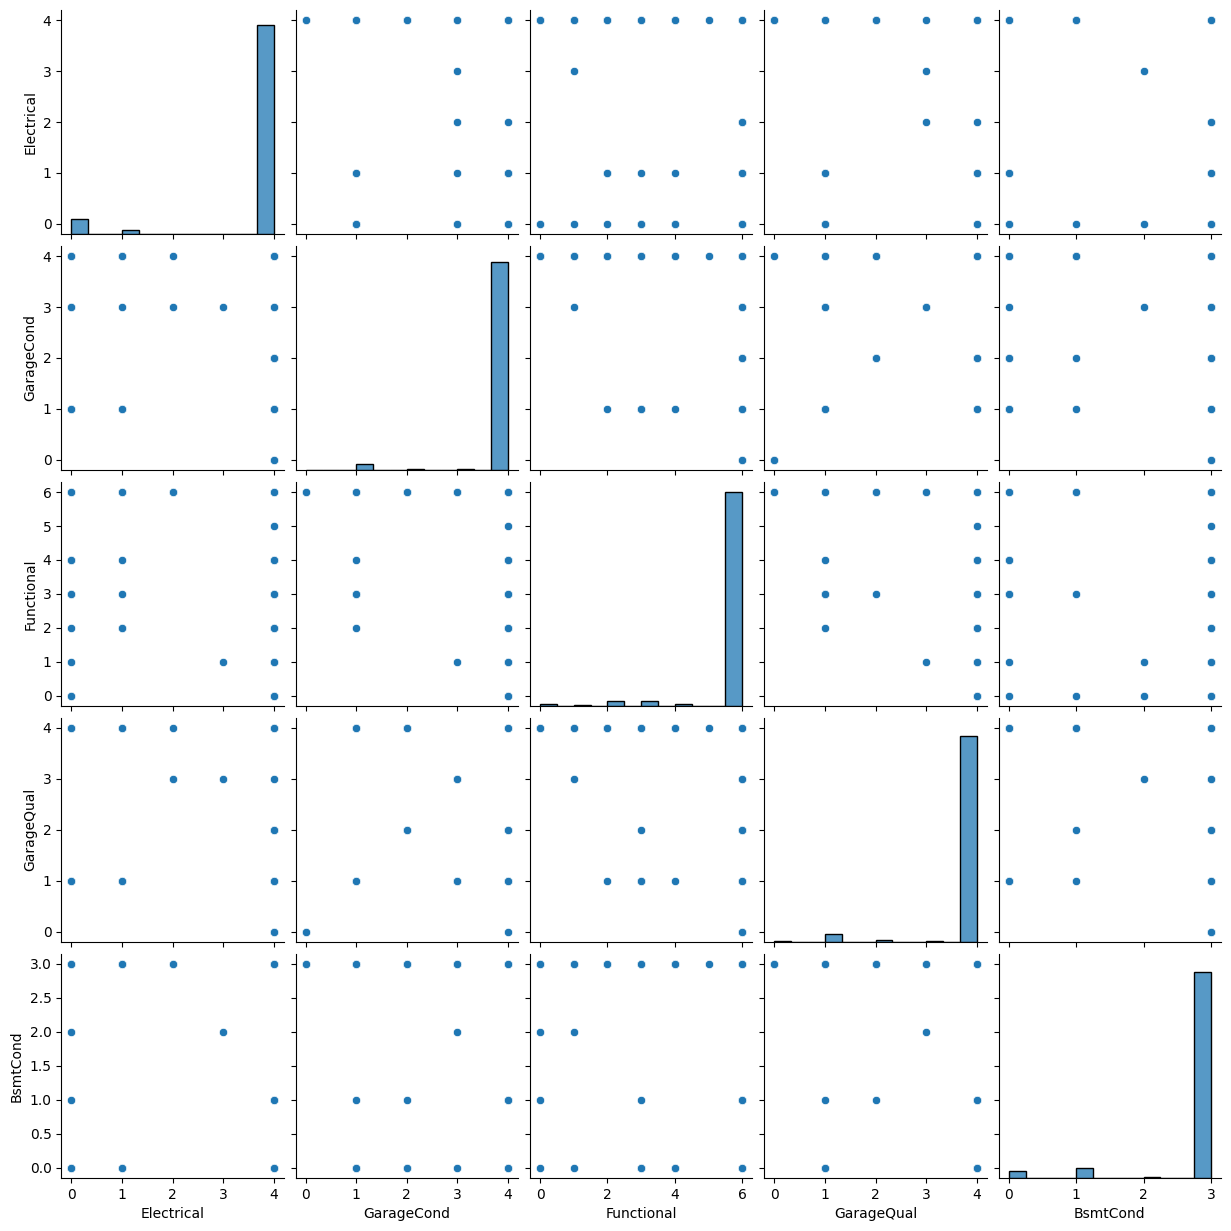

In [103]:
# Now we plot pairplot for top ordinal features
sns.pairplot(encoded_ord_df[top_ord_features.index])
plt.show()